In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set styling parameters
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('fivethirtyeight')

from poibin import PoiBin
import pytest

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import ML models

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

import xgboost as xgb

In [ ]:
cases = pd.read_csv('/content/SCDB_2018_01_caseCentered_Citation.csv', encoding = 'ISO-8859-1')

In [ ]:
cases.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,authorityDecision1,authorityDecision2,lawType,lawSupp,lawMinor,majOpinWriter,majOpinAssigner,splitVote,majVotes,minVotes
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01,11/18/1946,1.0,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,4.0,NaN,6.0,600.0,35 U.S.C. § 33,78.0,78.0,1.0,8.0,1.0
1,1946-002,1946-002-01,1946-002-01-01,1946-002-01-01-01,11/18/1946,1.0,329 U.S. 14,67 S. Ct. 13,91 L. Ed. 12,1946 U.S. LEXIS 1725,...,4.0,NaN,6.0,600.0,18 U.S.C. § 398,81.0,87.0,1.0,6.0,3.0
2,1946-003,1946-003-01,1946-003-01-01,1946-003-01-01-01,11/18/1946,1.0,329 U.S. 29,67 S. Ct. 1,91 L. Ed. 22,1946 U.S. LEXIS 3037,...,1.0,NaN,2.0,207.0,NaN,84.0,78.0,1.0,5.0,4.0
3,1946-004,1946-004-01,1946-004-01-01,1946-004-01-01-01,11/25/1946,7.0,329 U.S. 40,67 S. Ct. 167,91 L. Ed. 29,1946 U.S. LEXIS 1696,...,4.0,NaN,6.0,600.0,49 Stat. 801,87.0,87.0,1.0,5.0,3.0
4,1946-005,1946-005-01,1946-005-01-01,1946-005-01-01-01,11/25/1946,1.0,329 U.S. 64,67 S. Ct. 154,91 L. Ed. 44,1946 U.S. LEXIS 2997,...,7.0,NaN,NaN,NaN,NaN,78.0,87.0,1.0,6.0,3.0


In [ ]:
og_data = pd.read_csv('/content/SCDB_2018_01_justiceCentered_Citation.csv', encoding = 'ISO-8859-1')

In [ ]:
og_data.head()

,caseId,docketId,caseIssuesId,voteId,dateDecision,decisionType,usCite,sctCite,ledCite,lexisCite,...,majVotes,minVotes,justice,justiceName,vote,opinion,direction,majority,firstAgreement,secondAgreement
0,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-01,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,86,HHBurton,2.0,1.0,1.0,1.0,NaN,NaN
1,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-02,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,84,RHJackson,1.0,1.0,2.0,2.0,NaN,NaN
2,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-03,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,81,WODouglas,1.0,1.0,2.0,2.0,NaN,NaN
3,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-04,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,80,FFrankfurter,4.0,2.0,2.0,2.0,NaN,NaN
4,1946-001,1946-001-01,1946-001-01-01,1946-001-01-01-01-05,11/18/1946,1,329 U.S. 1,67 S. Ct. 6,91 L. Ed. 3,1946 U.S. LEXIS 1724,...,8,1,79,SFReed,1.0,1.0,2.0,2.0,NaN,NaN


In [ ]:
og_data.columns

Index(['caseId', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
       'decisionType', 'usCite', 'sctCite', 'ledCite', 'lexisCite', 'term',
       'naturalCourt', 'chief', 'docket', 'caseName', 'dateArgument',
       'dateRearg', 'petitioner', 'petitionerState', 'respondent',
       'respondentState', 'jurisdiction', 'adminAction', 'adminActionState',
       'threeJudgeFdc', 'caseOrigin', 'caseOriginState', 'caseSource',
       'caseSourceState', 'lcDisagreement', 'certReason', 'lcDisposition',
       'lcDispositionDirection', 'declarationUncon', 'caseDisposition',
       'caseDispositionUnusual', 'partyWinning', 'precedentAlteration',
       'voteUnclear', 'issue', 'issueArea', 'decisionDirection',
       'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
       'lawType', 'lawSupp', 'lawMinor', 'majOpinWriter', 'majOpinAssigner',
       'splitVote', 'majVotes', 'minVotes', 'justice', 'justiceName', 'vote',
       'opinion', 'direction', 'majority', 'firstA

In [ ]:
working_data = og_data.drop(columns = ['justice', 'docketId', 'caseIssuesId', 'voteId', 'dateDecision',
                                        'usCite', 'sctCite', 'ledCite', 'lexisCite',
                                        'docket', 'caseName', 'petitionerState', 'respondentState',
                                        'adminActionState', 'caseOriginState',
                                        'caseSourceState', 'declarationUncon',
                                        'caseDispositionUnusual', 'partyWinning', 'voteUnclear',
                                        'decisionDirectionDissent', 'authorityDecision1', 'authorityDecision2',
                                        'lawMinor', 'majOpinWriter', 'majOpinAssigner',
                                        'splitVote','firstAgreement', 'secondAgreement',
                                        'dateArgument', 'dateRearg',
                                        'term', 'caseDisposition', 'decisionDirection',
                                        'majVotes', 'minVotes', 'majority', 'vote', 'opinion',
                                       'precedentAlteration', 'issueArea'])

In [ ]:
working_data.columns

Index(['caseId', 'decisionType', 'naturalCourt', 'chief', 'petitioner',
       'respondent', 'jurisdiction', 'adminAction', 'threeJudgeFdc',
       'caseOrigin', 'caseSource', 'lcDisagreement', 'certReason',
       'lcDisposition', 'lcDispositionDirection', 'issue', 'lawType',
       'lawSupp', 'justiceName', 'direction'],
      dtype='object')

In [ ]:
working_data = working_data.dropna(subset=['direction'])
working_data = working_data.fillna(int(999))
d = {1: 0, 2: 1}
working_data['direction'] = working_data['direction'].map(d)

In [ ]:
not_to_dummy = ['caseId', 'justiceName', 'direction']
wd_columns_to_dummy = list(working_data.columns)
for n in not_to_dummy:
    wd_columns_to_dummy.remove(n)
wd_columns_to_dummy

['decisionType',
 'naturalCourt',
 'chief',
 'petitioner',
 'respondent',
 'jurisdiction',
 'adminAction',
 'threeJudgeFdc',
 'caseOrigin',
 'caseSource',
 'lcDisagreement',
 'certReason',
 'lcDisposition',
 'lcDispositionDirection',
 'issue',
 'lawType',
 'lawSupp']

In [ ]:
working_data = pd.get_dummies(working_data, columns = wd_columns_to_dummy)

In [ ]:
working_data.head()

,caseId,justiceName,direction,decisionType_1,decisionType_2,decisionType_4,decisionType_6,decisionType_7,naturalCourt_1301,naturalCourt_1303,...,lawSupp_505.0,lawSupp_506.0,lawSupp_507.0,lawSupp_508.0,lawSupp_509.0,lawSupp_511.0,lawSupp_512.0,lawSupp_600.0,lawSupp_900.0,lawSupp_999.0
0,1946-001,HHBurton,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1946-001,RHJackson,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1946-001,WODouglas,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1946-001,FFrankfurter,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1946-001,SFReed,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
working_data.justiceName.value_counts()

HLBlack         2956
WODouglas       2877
TCClark         2132
EWarren         2100
JHarlan2        1999
WJBrennan       1931
FFrankfurter    1721
PStewart        1633
HHBurton        1327
BRWhite         1134
SFReed          1085
RHJackson        804
FMVinson         762
SMinton          658
CEWhittaker      641
AFortas          525
AJGoldberg       440
WBRutledge       368
FMurphy          361
TMarshall        310
WEBurger          71
Name: justiceName, dtype: int64

In [ ]:
working_data.isna().sum()

caseId            0
justiceName       0
direction         0
decisionType_1    0
decisionType_2    0
                 ..
lawSupp_511.0     0
lawSupp_512.0     0
lawSupp_600.0     0
lawSupp_900.0     0
lawSupp_999.0     0
Length: 1026, dtype: int64

In [ ]:
working_data['direction']

0        0
1        1
2        1
3        1
4        1
        ..
27654    1
27655    1
27656    1
27657    1
27658    1
Name: direction, Length: 25835, dtype: int64

## Modeling

### Random Forest

Just issue areas (for the sake of dimensionality, to see if there's any true value to keeping all those categories).

In [ ]:
#no_issue_data = working_data.drop(columns = ['issue'])
no_issue_data = working_data

In [ ]:
Ginsburg_df = no_issue_data[no_issue_data['justiceName'] == 'RBGinsburg']

In [ ]:
# if Ginsburg_df[Ginsburg_df['adminAction'].notnull()]:
#     Ginsburg_df['lcDisposition'] = 4

Ginsburg_df = Ginsburg_df.dropna(subset=['direction'])

In [ ]:
case_ids = Ginsburg_df['caseId']
Ginsburg_df = Ginsburg_df.drop(columns = ['caseId', 'justiceName'])
# df = df[pd.notnull(df['EPS'])]

In [ ]:
Ginsburg_target = Ginsburg_df['direction']
Ginsburg_df = Ginsburg_df.drop(columns = ['direction'])

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Generate some random data
Ginsburg_df = np.random.rand(100, 10)
Ginsburg_target = np.random.randint(0, 2, size=(100,))
case_ids = np.arange(100)

# Split the data
data_train, data_test, target_train, target_test, case_train, case_test = train_test_split(
    Ginsburg_df, Ginsburg_target, case_ids, test_size=0.25, random_state=42
)

In [ ]:
case_test

array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0, 18, 30, 73, 33, 90,  4, 76,
       77, 12, 31, 55, 88, 26, 42, 69])

In [ ]:
forest = RandomForestClassifier(oob_score = True, n_estimators=200, max_depth = 30)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=30, n_estimators=200, oob_score=True)

In [ ]:
forest.oob_score_

0.5333333333333333

In [ ]:
print("On Training, score was {}".format(forest.score(data_train, target_train)))
print("On Test, score was {}".format(forest.score(data_test, target_test)))

On Training, score was 1.0
On Test, score was 0.48


In [ ]:
probs = forest.predict_proba(data_test)
roc_auc_score(target_test, probs[:,1])

0.41346153846153844

In [ ]:
probs_series = pd.DataFrame(data=probs[:, 1], index=np.arange(len(case_test)))


In [ ]:
import pandas as pd

# Assuming `data_test['direction']` is a Pandas Series and `working_test_cases` is a DataFrame or Series
outcomes_series = pd.DataFrame({'direction': data_test['direction'].values}, index=working_test_cases.index)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
probs_with_ids = pd.concat([probs_series, case_test], axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [ ]:
probs_with_ids.head()

NameError: name 'probs_with_ids' is not defined

In [ ]:
probs_with_ids.rename(columns={0:'probability'}, inplace=True)

NameError: name 'probs_with_ids' is not defined

In [ ]:
probs_with_ids.head()

In [ ]:
justices = ['RBG', 'Alito', 'Souter']

In [ ]:
master_probas = pd.DataFrame(columns = justices, index = case_test.values)

In [ ]:
master_probas.head()

In [ ]:
for ind, row in probs_with_ids.iterrows():
    case = row['caseId']
    probabil = row['probability']
    master_probas['RBG'].loc[case] = probabil

In [ ]:
master_probas.head()

In [ ]:
master_probas = master_probas.fillna(2)

In [ ]:
master_probas.head()

In [ ]:
ps = dict.fromkeys(list(master_probas.index.values), 0)

In [ ]:
ps

In [ ]:
for ind, row in master_probas.iterrows():
    lista = []
    for c in master_probas.columns:
        if row[c] != 2:
            lista.append(row[c])
    lista = lista + [0.7, 0.5, 0.66, 0.44, 0.9, 0.83, 0.7, 0.71]
    ps[ind] = lista

In [ ]:
print(ps)

In [ ]:
outcomes = {}
x = [5, 6, 7, 8, 9]

In [ ]:
for k in ps.keys():
    if len(ps[k]) == 9:
        pb = PoiBin(ps[k])
        outcomes[k] = sum(pb.pmf(x))


In [ ]:
outcomes

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(forest.predict(data_test), target_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[7 8]
 [5 5]]


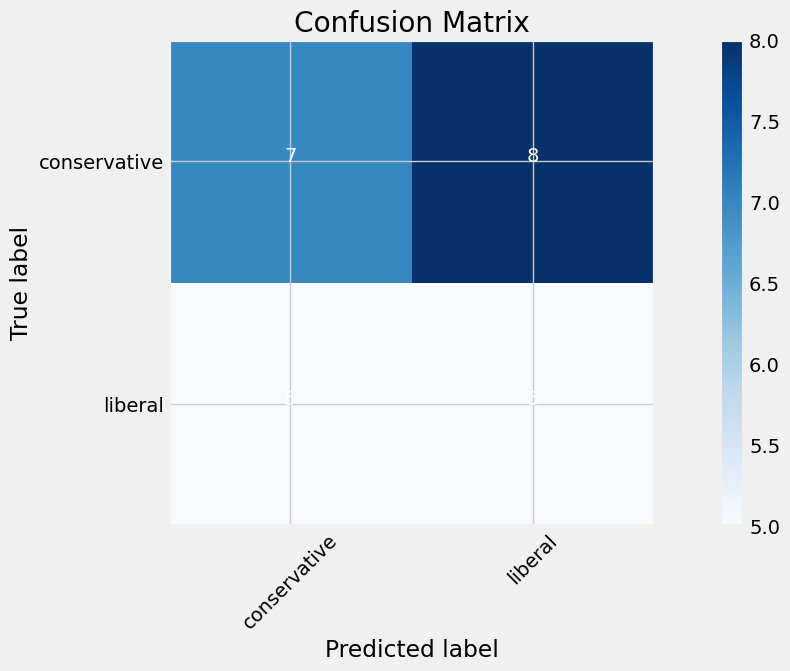

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = ['conservative', 'liberal'] #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [ ]:
forest = RandomForestClassifier(oob_score = True, n_estimators=1500, max_depth = 30)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=30, n_estimators=1500, oob_score=True)

In [ ]:
# Using GridSearchCV to do hyperparameter tuning, note that this takes a while to run and will tax your system
# a bit if you're running this on a laptop.

# n_estimators = [300, 500, 700]
# max_depth = [10,12,14,16]

# param_grid_forest = dict(n_estimators=n_estimators, max_depth=max_depth)


# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# grid_search = GridSearchCV(forest, param_grid_forest, scoring="accuracy", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(data_train, target_train)

# # Interpreting results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(data_train, target_train)

In [ ]:
probs = model_log.predict_proba(data_test)
roc_auc_score(target_test, probs[:,1])

0.41666666666666663

In [ ]:
print("On Training, score was {}".format(model_log.score(data_train, target_train)))
print("On Test, score was {}".format(model_log.score(data_test, target_test)))

On Training, score was 0.6133333333333333
On Test, score was 0.44


In [ ]:
cnf_matrix = confusion_matrix(model_log.predict(data_test), target_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[5 7]
 [7 6]]


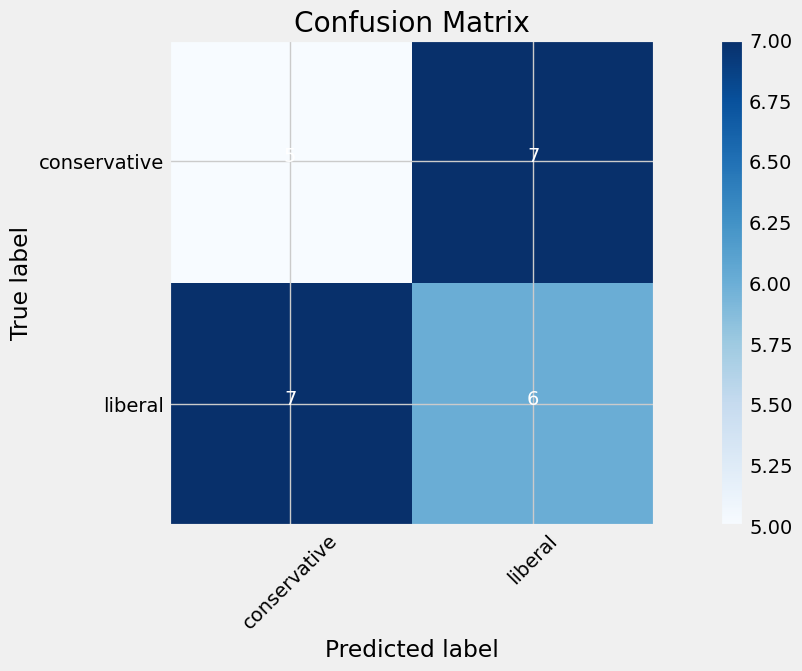

In [ ]:
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = ['conservative', 'liberal'] #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [ ]:
# eval_set = [(data_test, target_test)]
# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(data_train, target_train, early_stopping_rounds=30, eval_metric="error", eval_set=eval_set, verbose=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
nb = GaussianNB()
nbmodel = nb.fit(data_train, target_train)
nbpreds = nbmodel.predict(data_test)
accuracy = accuracy_score(target_test, nbpreds)

In [ ]:
accuracy

0.4

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='rbf', probability = True, random_state = 124)
svmmodel = sv.fit(data_train, target_train)
svmpreds = svmmodel.predict(data_test)
accuracy_score(target_test, svmpreds)

0.44